<a href="https://colab.research.google.com/github/MykhailoMykhailiuk/DS-HW/blob/main/Hw10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(strides=2),
    layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'),
    layers.MaxPooling2D(strides=2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 48)          │          38,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         307,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          21,588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369,174 (1.41 MB)

 Trainable params: 369,174 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', loss)
print('Test accuracy', accuracy)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 171ms/step - accuracy: 0.7275 - loss: 0.7661 - val_accuracy: 0.8463 - val_loss: 0.4146
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 169ms/step - accuracy: 0.8745 - loss: 0.3436 - val_accuracy: 0.8811 - val_loss: 0.3288
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 165ms/step - accuracy: 0.8984 - loss: 0.2839 - val_accuracy: 0.8954 - val_loss: 0.2957
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - accuracy: 0.9088 - loss: 0.2479 - val_accuracy: 0.8935 - val_loss: 0.2844
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.9178 - loss: 0.2221 - val_accuracy: 0.9028 - val_loss: 0.2671
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 166ms/step - accuracy: 0.9238 - loss: 0.2055 - val_accuracy: 0.9082 - val_loss: 0.2580
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 169ms/step - accuracy: 0.9325 - loss: 0.1803 - val_accuracy: 0.9115 - val_loss: 0.2549
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 164ms/step - accuracy: 0.9389 - loss: 0

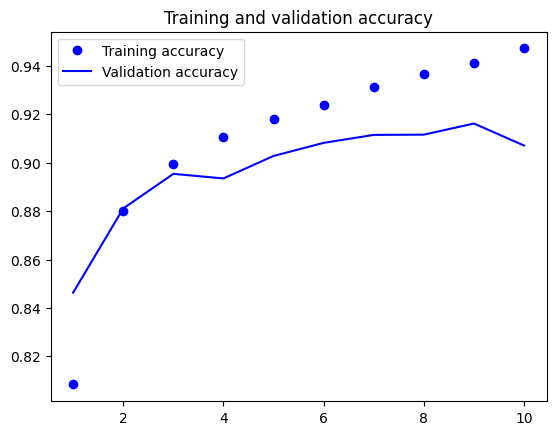

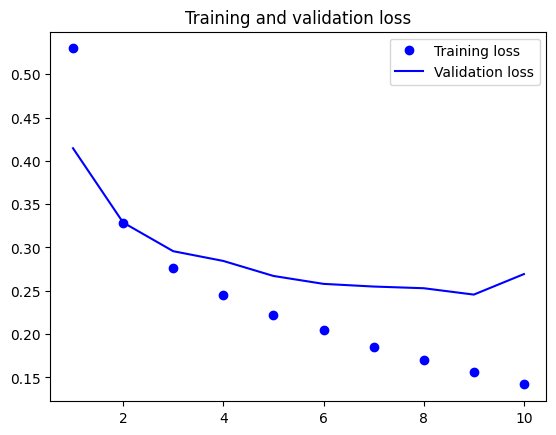

In [6]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Висновок**

Багатошарова мережа з попереднього завдання показала 0.87 точність на тестовій вибірці, в той час, як згорткова мережа показала точність в 0.91 та функцію втрат в 0.24. Можна сказати, що згорткові шари працюють краще.